بسم الله

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud
import plotly.graph_objects as go

import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("/home/surabhia/Documents/analysis notebook/retailanalysis/new_retail_data.csv")
df

IOError: [Errno 2] File /home/surabhia/Documents/analysis notebook/archive/new_retail_data.csv does not exist: '/home/surabhia/Documents/analysis notebook/archive/new_retail_data.csv'

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302010 entries, 0 to 302009
Data columns (total 30 columns):
Transaction_ID      301677 non-null float64
Customer_ID         301702 non-null float64
Name                301628 non-null object
Email               301663 non-null object
Phone               301648 non-null float64
Address             301695 non-null object
City                301762 non-null object
State               301729 non-null object
Zipcode             301670 non-null float64
Country             301739 non-null object
Age                 301837 non-null float64
Gender              301693 non-null object
Income              301720 non-null object
Customer_Segment    301795 non-null object
Date                301651 non-null object
Year                301660 non-null float64
Month               301737 non-null object
Time                301660 non-null object
Total_Purchases     301649 non-null float64
Amount              301653 non-null float64
Total_Amount        3

In [ ]:
df.shape

(302010, 30)

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
df.head(5)

,Transaction_ID,Customer_ID,Name,Email,Phone,Address,City,State,Zipcode,Country,Age,Gender,Income,Customer_Segment,Date,Year,Month,Time,Total_Purchases,Amount,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products
0,8691788.0,37249.0,Michelle Harrington,Ebony39@gmail.com,1.414787e+09,3959 Amanda Burgs,Dortmund,Berlin,77985.0,Germany,21.0,Male,Low,Regular,9/18/2023,2023.0,September,22:03:55,3.0,108.028757,324.086270,Clothing,Nike,Shorts,Excellent,Same-Day,Debit Card,Shipped,5.0,Cycling shorts
1,2174773.0,69749.0,Kelsey Hill,Mark36@gmail.com,6.852900e+09,82072 Dawn Centers,Nottingham,England,99071.0,UK,19.0,Female,Low,Premium,12/31/2023,2023.0,December,8:42:04,2.0,403.353907,806.707815,Electronics,Samsung,Tablet,Excellent,Standard,Credit Card,Processing,4.0,Lenovo Tab
2,6679610.0,30192.0,Scott Jensen,Shane85@gmail.com,8.362160e+09,4133 Young Canyon,Geelong,New South Wales,75929.0,Australia,48.0,Male,Low,Regular,4/26/2023,2023.0,April,4:06:29,3.0,354.477600,1063.432799,Books,Penguin Books,Children's,Average,Same-Day,Credit Card,Processing,2.0,Sports equipment
3,7232460.0,62101.0,Joseph Miller,Mary34@gmail.com,2.776752e+09,8148 Thomas Creek Suite 100,Edmonton,Ontario,88420.0,Canada,56.0,Male,High,Premium,5/8/2023,2023.0,May,14:55:17,7.0,352.407717,2466.854021,Home Decor,Home Depot,Tools,Excellent,Standard,PayPal,Processing,4.0,Utility knife
4,4983775.0,27901.0,Debra Coleman,Charles30@gmail.com,9.098268e+09,5813 Lori Ports Suite 269,Bristol,England,48704.0,UK,22.0,Male,Low,Premium,1/10/2024,2024.0,January,16:54:07,2.0,124.276525,248.553049,Grocery,Nestle,Chocolate,Bad,Standard,Cash,Shipped,1.0,Chocolate cookies


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Transaction_ID,301677.0,5.495823e+06,2.595565e+06,1.000007e+06,3.247930e+06,5.499657e+06,7.739509e+06,9.999995e+06
Customer_ID,301702.0,5.500655e+04,2.600568e+04,1.000000e+04,3.246925e+04,5.501200e+04,7.751100e+04,9.999900e+04
Phone,301648.0,5.501464e+09,2.596017e+09,1.000049e+09,3.255061e+09,5.505812e+09,7.749860e+09,9.999996e+09
Zipcode,301670.0,5.029895e+04,2.897281e+04,5.010000e+02,2.542500e+04,5.060250e+04,7.525200e+04,9.994900e+04
Age,301837.0,3.548133e+01,1.502193e+01,1.800000e+01,2.200000e+01,3.200000e+01,4.600000e+01,7.000000e+01
Year,301660.0,2.023165e+03,3.712832e-01,2.023000e+03,2.023000e+03,2.023000e+03,2.023000e+03,2.024000e+03
Total_Purchases,301649.0,5.359729e+00,2.868575e+00,1.000000e+00,3.000000e+00,5.000000e+00,8.000000e+00,1.000000e+01
Amount,301653.0,2.551637e+02,1.413896e+02,1.000022e+01,1.328908e+02,2.554710e+02,3.776726e+02,4.999979e+02
Total_Amount,301660.0,1.367651e+03,1.128999e+03,1.000375e+01,4.387243e+02,1.041118e+03,2.030000e+03,4.999626e+03
Ratings,301826.0,3.162670e+00,1.320827e+00,1.000000e+00,2.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


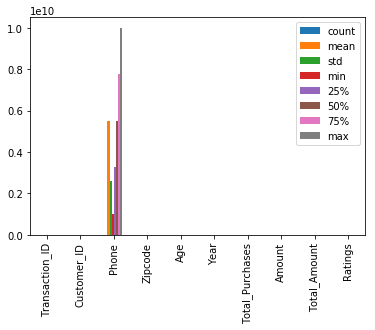

In [ ]:
df.describe().T.plot(kind='bar')

In [ ]:
    df.isna().sum()

Transaction_ID      333
Customer_ID         308
Name                382
Email               347
Phone               362
Address             315
City                248
State               281
Zipcode             340
Country             271
Age                 173
Gender              317
Income              290
Customer_Segment    215
Date                359
Year                350
Month               273
Time                350
Total_Purchases     361
Amount              357
Total_Amount        350
Product_Category    283
Product_Brand       281
Product_Type          0
Feedback            184
Shipping_Method     337
Payment_Method      297
Order_Status        235
Ratings             184
products              0
dtype: int64

In [ ]:
df=df.fillna(0)

In [ ]:
df.duplicated().sum()

4

In [ ]:
df = df.drop_duplicates()

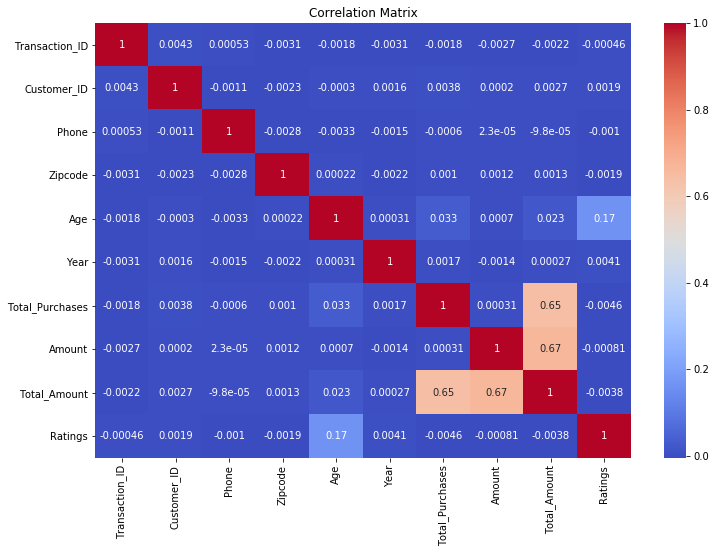

In [ ]:
numeric_cols = df.select_dtypes(include=np.number).columns  # اختيار الأعمدة الرقمية فقط
plt.figure(figsize=(12, 8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
df.columns.to_list()

In [ ]:
import plotly.express as px

columns = ['Transaction_ID',
 'Customer_ID',
 'Name',
 'Email',
 'Phone',
 'Address',
 'City',
 'State',
 'Zipcode',
 'Country',
 'Age',
 'Gender',
 'Income',
 'Customer_Segment',
 'Date',
 'Year',
 'Month',
 'Time',
 'Total_Purchases',
 'Amount',
 'Total_Amount',
 'Product_Category',
 'Product_Brand',
 'Product_Type',
 'Feedback',
 'Shipping_Method',
 'Payment_Method',
 'Order_Status',
 'Ratings',
 'products']
for column in columns:
    fig = px.histogram(data_frame=df, x=column)
    fig.show()

In [ ]:
df['Age'].plot(kind='hist',bins=20)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

In [ ]:
# top_10_States
top_10_state = df['State'].value_counts().head(10)
# Plot count of cities by state
plt.figure(figsize=(12, 6))
sns.countplot(data=df[df['State'].isin(top_10_state.index)], x='State')
plt.xlabel('State')
plt.ylabel('count')
plt.title('Distribution of  State')
plt.xticks(rotation=45)
plt.show()

In [ ]:
plt.figure(figsize=(12, 6))
gender=sns.countplot(x='Month',data=df)


for bars in gender.containers:
    gender.bar_label(bars)

plt.title('Month Bar plot with Count')
plt.show()

In [ ]:
sns.pairplot(df)

KeyboardInterrupt: 

In [ ]:
df.hist(bins = 20, figsize = (20,20), color = 'g')
plt.show()